In [36]:
from collections import namedtuple

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [37]:
from sympy.physics.units import newton, meter
mm = meter / 1000
MPa = 1e6 * newton / meter**2
GPa = 1e9 * newton / meter**2

In [38]:
def load(file):
    data = pd.read_csv(file, index_col=0, skiprows=94)

#     data['Extension mm'] *= mm
#     data['Load kgf'] *= newton
    data['stress'] = data['Compressive stress MPa']
    data['strain'] = data['Compressive strain %']
    return data

In [39]:
sample1 = load('data/Packing_Peanuts_Instron/Starch_1_raw.is_comp.raw')

In [41]:
pd.Insample1['Extension mm'].get_loc('Test Type')

AttributeError: 'Series' object has no attribute 'get_loc'

In [35]:
sample1

,Extension mm,Load kgf,Compressive stress MPa,Cycle Count,Total Cycle Count,Repetitions Count,Marked Data,PIP Count,Compressive extension mm,Compressive strain %,Compressive load kgf,Displacement (Strain 1) mm,True strain %,Corrected Position mm,True stress Pa,stress,strain
Time sec,,,,,,,,,,,,,,,,,
0,-0.000266666,-0.0006676167,2.601668e-005,0,0,0,0,0,0.000266666,0.001251953,0.0006676167,0,0.001251961,-0.000266666,26.01636,2.601668e-005,0.001251953
0.1,-0.00266666,-0.002070114,8.06713e-005,0,0,0,0,0,0.00266666,0.01251953,0.002070114,0,0.01252031,-0.00266666,80.6612,8.06713e-005,0.01251953
0.2,-0.01306663,-0.002205912,8.596325e-005,0,0,0,0,0,0.01306663,0.0613457,0.002205912,0,0.06136453,-0.01306663,85.91052,8.596325e-005,0.0613457
0.3,-0.02613327,-0.00257549,0.0001003656,0,0,0,0,0,0.02613327,0.1226914,0.00257549,0,0.1227667,-0.02613327,100.2424,0.0001003656,0.1226914
0.4,-0.03826657,-0.002466447,9.611619e-005,0,0,0,0,0,0.03826657,0.1796553,0.002466447,0,0.1798169,-0.03826657,95.94351,9.611619e-005,0.1796553
0.5,-0.04933321,-0.002718966,0.0001059567,0,0,0,0,0,0.04933321,0.2316113,0.002718966,0,0.23188,-0.04933321,105.7113,0.0001059567,0.2316113
0.6,-0.05933319,-0.00181436,7.070467e-005,0,0,0,0,0,0.05933319,0.2785596,0.00181436,0,0.2789483,-0.05933319,70.50772,7.070467e-005,0.2785596
0.7000001,-0.06999983,-0.002823808,0.0001100424,0,0,0,0,0,0.06999983,0.3286377,0.002823808,0,0.3291789,-0.06999983,109.6807,0.0001100424,0.3286377
0.8,-0.08013314,-0.00316475,0.0001233287,0,0,0,0,0,0.08013314,0.3762119,0.00316475,0,0.3769214,-0.08013314,122.8647,0.0001233287,0.3762119


In [5]:
def process(data, area, length):
    data['stress'] = data.load / area
    data['strain'] = data.extension / length

process(sample1, 10*mm**2, 10*mm)

In [6]:
samples = []

for file, area, length in [
    ('data/Packing_Peanuts_Instron/Starch_1_raw.is_comp_RawData/Specimen_RawData_1.csv', 10*mm**2, 10*mm),
    ('data/Packing_Peanuts_Instron/Starch_1.is_comp_RawData/Specimen_RawData_2.csv', 10*mm**2, 10*mm),
    ('data/Packing_Peanuts_Instron/Starch_1.is_comp_RawData/Specimen_RawData_3.csv', 10*mm**2, 10*mm),
    ('data/Packing_Peanuts_Instron/Starch_1.is_comp_RawData/Specimen_RawData_4.csv', 10*mm**2, 10*mm),
]:
    sample = load(file)
    process(sample, area, length)
    samples.append(sample)

In [7]:
samples[0].head()

,extension,load,stress,strain
0.0,-2.7e-7*meter,-0.00655*newton,-655.0*newton/meter**2,-2.70000000000000e-5
0.1,-2.67e-6*meter,-0.0203*newton,-2030.0*newton/meter**2,-0.000267000000000000
0.2,-1.307e-5*meter,-0.02163*newton,-2163.0*newton/meter**2,-0.00130700000000000
0.3,-2.613e-5*meter,-0.02526*newton,-2526.0*newton/meter**2,-0.00261300000000000
0.4,-3.827e-5*meter,-0.02419*newton,-2419.0*newton/meter**2,-0.00382700000000000


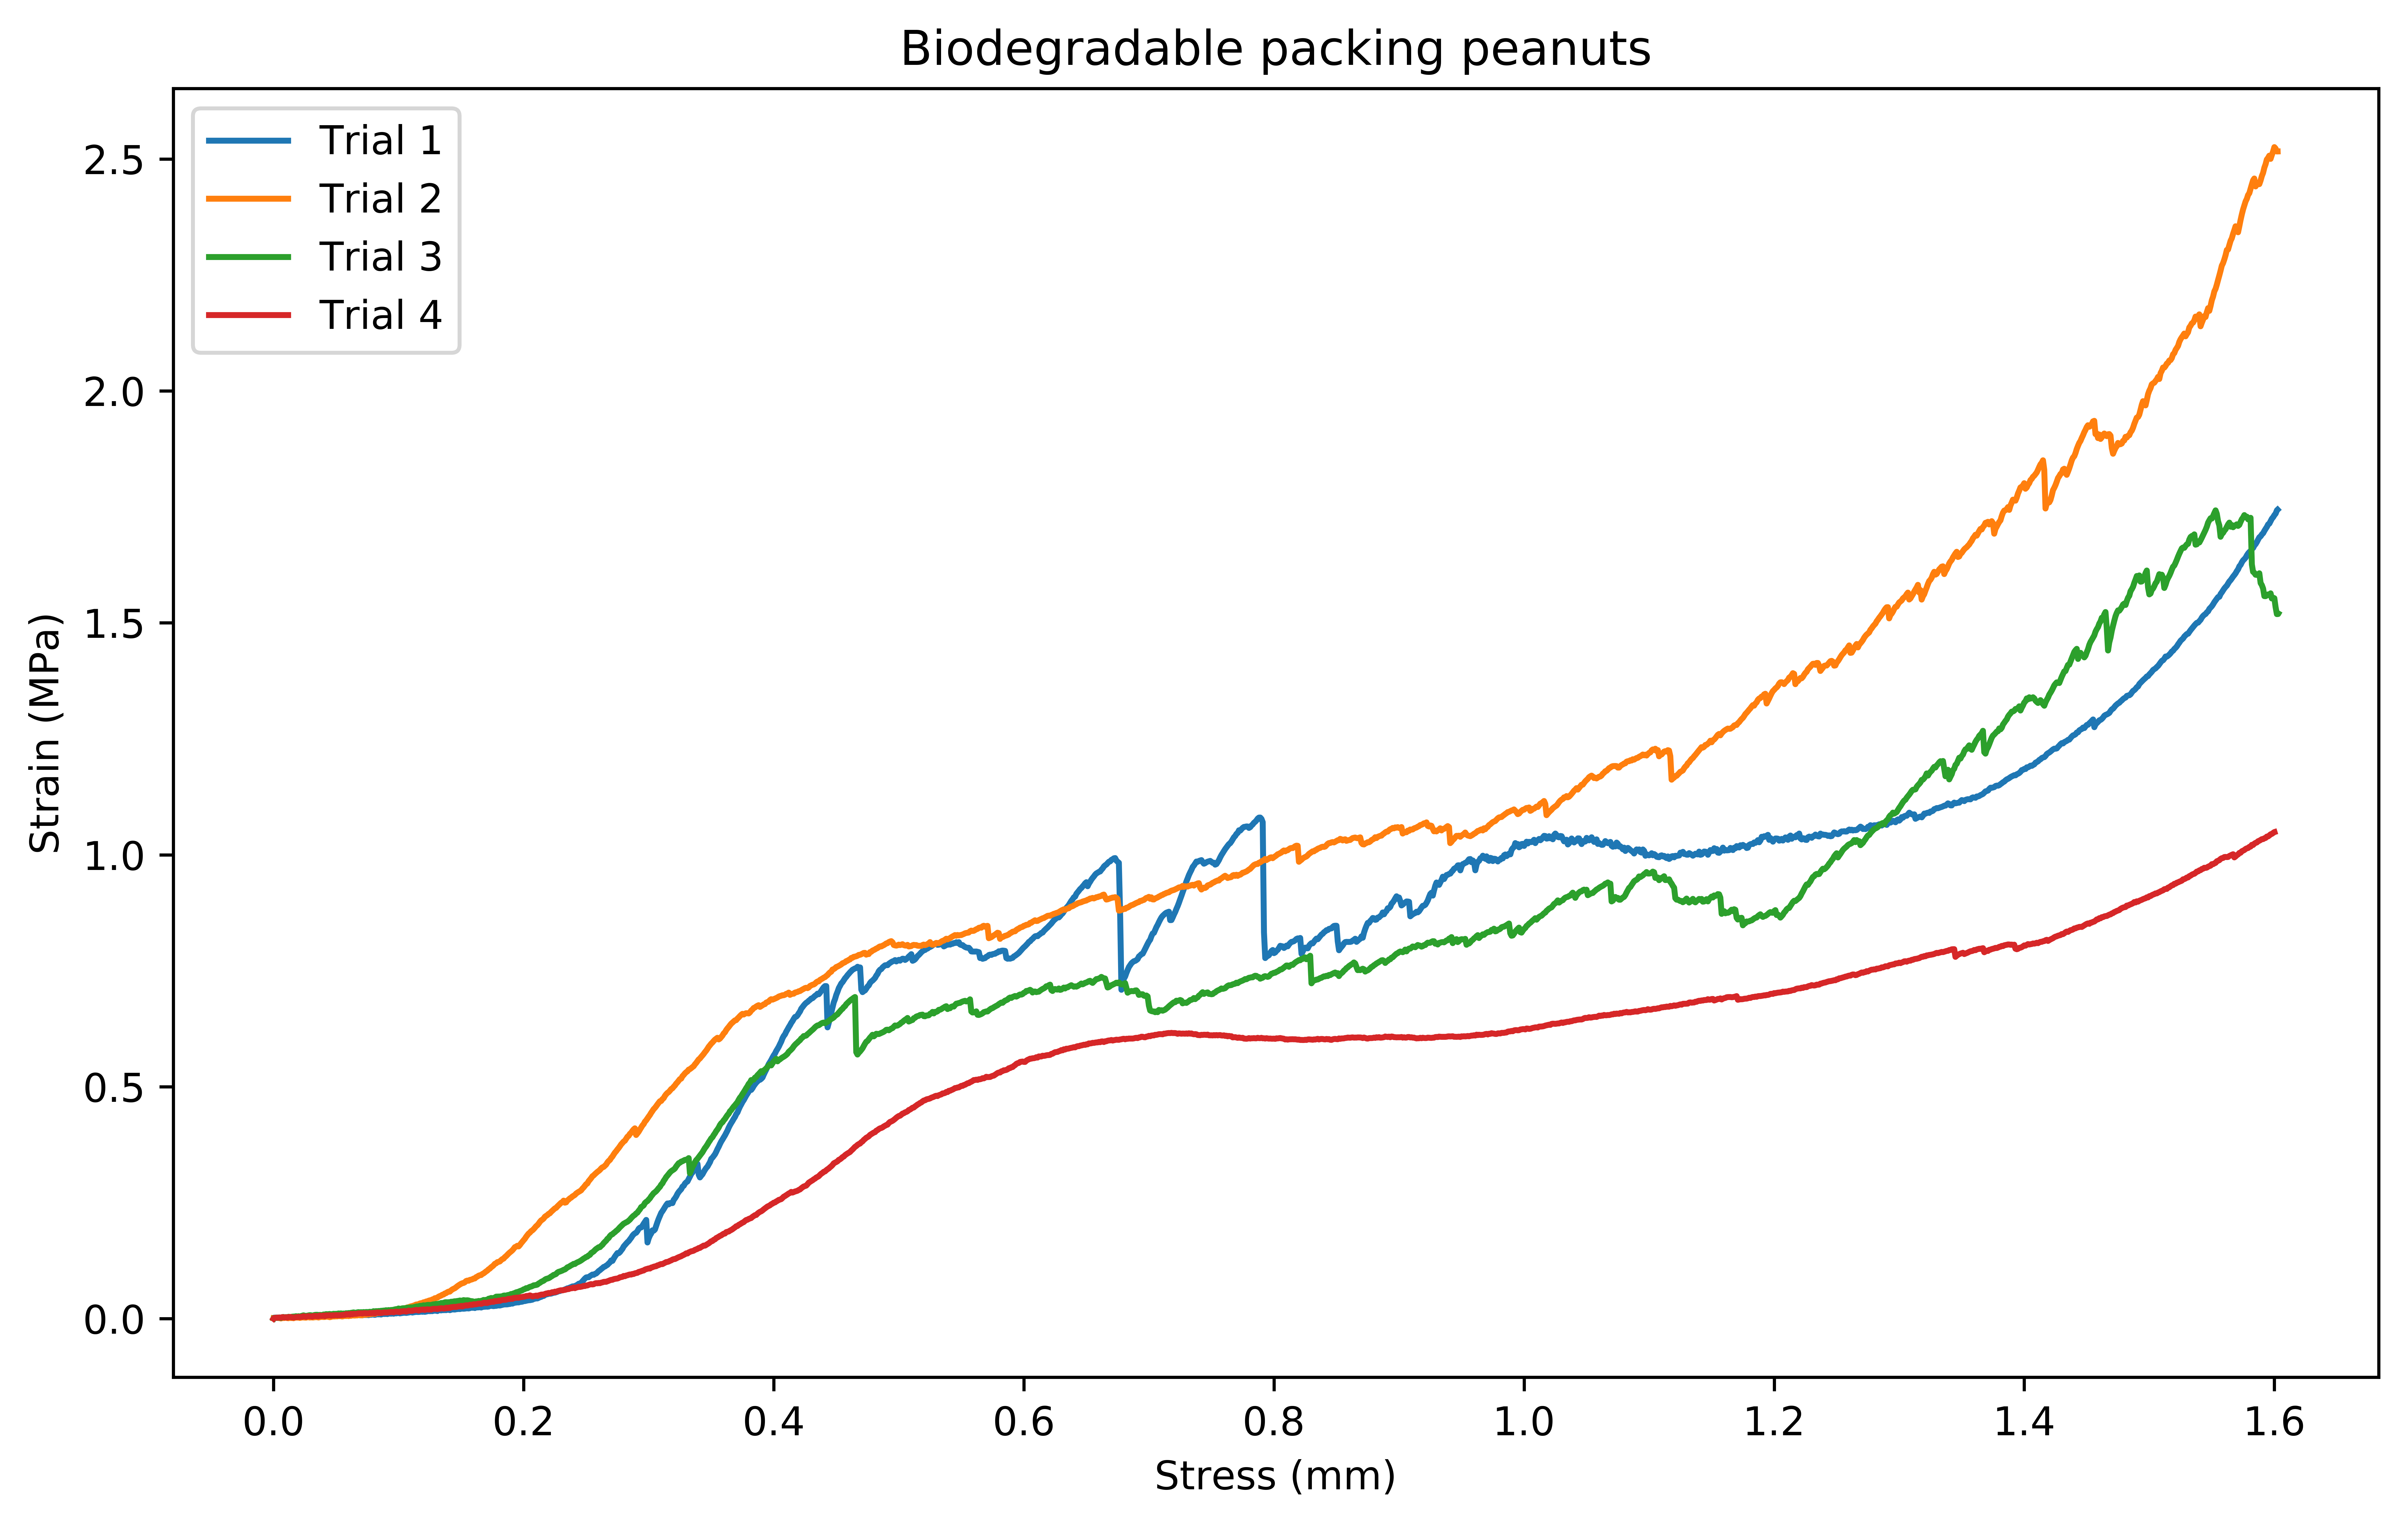

In [15]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=1000, facecolor='w', edgecolor='k')

plt.xlabel('Strain (mm)')
plt.ylabel('Stress (MPa)')
plt.title('Biodegradable packing peanuts')

for i, sample in enumerate(samples):
    plt.plot(-sample.strain, -sample.stress / MPa, label=f'Trial {i+1}')

plt.legend();